![title](https://image.ibb.co/erDntK/logo2018.png)

---

# Final Task - Multiclass Classification




Write down your Name and Student ID

In [0]:
## --- start your code here ----

NIM1  = 1301164318
Nama1 = "Maxalmina Satria Kahfi"

NIM2  = 1301160098
Nama2 = "Panji Bagaskara"

NIM3  = 1301160343
Nama3 = "Rizki Alfarid Gusna"

## --- end your code here ----

# Import Libraries


## Install TensorFlow 2


In [2]:
!pip install tensorflow-gpu -q

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 3.8MB 47.6MB/s 
     |████████████████████████████████| 450kB 56.4MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.


In [3]:
import tensorflow as tf
tf.__version__

'2.0.0'


## Import other libraries


In [0]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=7)
%matplotlib inline

import tensorflow_datasets as tfds

from tensorflow.keras import Model
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import LearningRateScheduler

from collections import Counter
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image

from PIL import Image

## Create Directory for Dataset

In [0]:
import os

data_dir = 'dataset'
os.mkdir(data_dir)

---
# TFDS Datasets


In [6]:
dataset_names = tfds.list_builders()

for name in dataset_names:
    print(name)

abstract_reasoning
aeslc
aflw2k3d
amazon_us_reviews
bair_robot_pushing_small
big_patent
bigearthnet
billsum
binarized_mnist
binary_alpha_digits
c4
caltech101
caltech_birds2010
caltech_birds2011
cars196
cassava
cats_vs_dogs
celeb_a
celeb_a_hq
chexpert
cifar10
cifar100
cifar10_1
cifar10_corrupted
clevr
cmaterdb
cnn_dailymail
coco
coco2014
coil100
colorectal_histology
colorectal_histology_large
curated_breast_imaging_ddsm
cycle_gan
deep_weeds
definite_pronoun_resolution
diabetic_retinopathy_detection
downsampled_imagenet
dsprites
dtd
dummy_dataset_shared_generator
dummy_mnist
emnist
eurosat
fashion_mnist
flores
food101
gap
gigaword
glue
groove
higgs
horses_or_humans
image_label_folder
imagenet2012
imagenet2012_corrupted
imagenet_resized
imdb_reviews
iris
kitti
kmnist
lfw
lm1b
lsun
malaria
mnist
mnist_corrupted
moving_mnist
multi_news
multi_nli
multi_nli_mismatch
newsroom
nsynth
omniglot
open_images_v4
oxford_flowers102
oxford_iiit_pet
para_crawl
patch_camelyon
pet_finder
places365_small
q

## Choose Dataset

In [0]:
dataset_name = "oxford_iiit_pet"


## Download Dataset


In [8]:
(train_set, test_set), dataset_info =  tfds.load( 
              name=dataset_name, 
              split=["train", "test"], 
              with_info=True, 
              data_dir=data_dir
          )

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset oxford_iiit_pet downloaded and prepared to dataset/oxford_iiit_pet/1.1.0. Subsequent calls will reuse this data.


## Dataset Information

In [9]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    version=1.1.0,
    description='The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
images for each class. The images have large variations in scale, pose and
lighting. All images have an associated ground truth annotation of breed.
',
    urls=['http://www.robots.ox.ac.uk/~vgg/data/pets/'],
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
    }),
    total_num_examples=7349,
    splits={
        'test': 3669,
        'train': 3680,
    },
    supervised_keys=('image', 'label'),
    citation="""@InProceedings{parkhi12a,
      author       = "Parkhi, O. M. and Vedaldi, A. and Zisserman, A. and Jawahar, C.~V.",
      title        = "Cats and Dogs",
      booktitle    =

### Detailed Information

In [10]:
class_names =  dataset_info.features["label"].names

print('image shape    :', dataset_info.features['image'].shape)
print('image dtype    :', dataset_info.features['image'].dtype)
print()
print('num class      : ',dataset_info.features["label"].num_classes)
print('class label    :', dataset_info.features["label"].names)
print()
print('num train data :', dataset_info.splits["train"].num_examples)
print('num test data  :', dataset_info.splits["test"].num_examples)

image shape    : (None, None, 3)
image dtype    : <dtype: 'uint8'>

num class      :  37
class label    : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']

num train data : 3680
num test data  : 3669


## Show Images

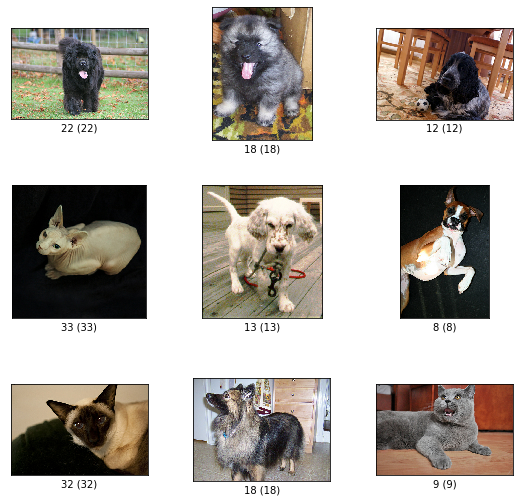

In [11]:
fig = tfds.show_examples(dataset_info, train_set, image_key='image')

# Preprocess Image

Convert and Resize Dataset to Numpy

In [0]:
input_shape = (224, 224, 3)

### Convert Data Train

In [0]:
X_train = []
y_train = []

for example in tfds.as_numpy(train_set):
    new_img = example['image']
    new_img = cv.resize(new_img, input_shape[:2],interpolation = cv.INTER_AREA) 
    X_train.append(new_img)
    y_train.append(example['label'])

del train_set

### Convert Data Test

In [0]:
X_test = []
y_test = []

for example in tfds.as_numpy(test_set):
    new_img = example['image']
    new_img = cv.resize(new_img, input_shape[:2],interpolation = cv.INTER_AREA) 
    X_test.append(new_img)
    y_test.append(example['label'])

del test_set

In [15]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_train.shape =',X_test.shape)
print('y_train.shape =',y_test.shape)

X_train.shape = (3680, 224, 224, 3)
y_train.shape = (3680,)
X_train.shape = (3669, 224, 224, 3)
y_train.shape = (3669,)


## Split Data Train into Train and Val

In [0]:
# X_val   = X_train[:1200]
# y_val   = y_train[:1200]

# X_train = X_train[1200:]
# y_train = y_train[1200:]

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [18]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

print('\nX_val.shape  =',X_val.shape)
print('y_val.shape  =',y_val.shape)

print('\nX_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (2576, 224, 224, 3)
y_train.shape = (2576,)

X_val.shape  = (1104, 224, 224, 3)
y_val.shape  = (1104,)

X_test.shape  = (3669, 224, 224, 3)
y_test.shape  = (3669,)


# One hot y labels

In [19]:
y_train_hot = to_categorical(y_train, 37)
y_val_hot   = to_categorical(y_val, 37)
y_test_hot  = to_categorical(y_test, 37)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (2576, 37)
y_val_hot.shape   = (1104, 37)
y_test_hot.shape  = (3669, 37)


---
# Classification Model

## Create your own model

For example:
* use pretrain
* define new layers
* define trainable layers
* have fun

In [20]:
model = MobileNet(input_shape=input_shape, include_top=False, weights="imagenet")

17227776/17225924 [==============================] - 1s 0us/step


In [0]:
x = model.layers[-1].output

# freeze selected layer
for layer in model.layers[10:]:
    layer.trainable = False

# add new classifier head
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(37, activation='softmax')(x)

# instantiate new model
myModel = Model(inputs=model.input, outputs=predictions, name="myMobile")

## Visualize Model

In [22]:
myModel.summary()

Model: "myMobile"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128

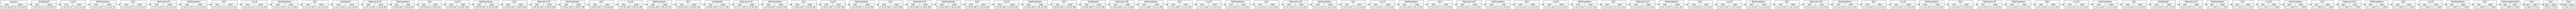

In [23]:
plot_model(myModel, show_shapes=True,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=60
)

## Compile Model



In [0]:
myModel.compile(
      loss='categorical_crossentropy',
      optimizer='adam', 
      metrics=['accuracy']
)

# Callbacks
Learning Rate Annealing

In [0]:
def scheduler(epoch):
  if epoch < 5:
    return 0.001
  else:
    return 0.001 * np.exp(0.1 * (10 - epoch))

callback = LearningRateScheduler(scheduler)

# Train the Model

In [0]:
history_all = []

In [0]:
batch_size = 100
epochs = 20

In [28]:
history = myModel.fit(
    X_train, y_train_hot,
    validation_data = (X_val, y_val_hot),
    epochs = epochs,
    callbacks=[callback],
    verbose = 2
)

history_all.append(history)

Train on 2576 samples, validate on 1104 samples
Epoch 1/20
2576/2576 - 28s - loss: 1.5434 - accuracy: 0.5524 - val_loss: 0.7374 - val_accuracy: 0.7582
Epoch 2/20
2576/2576 - 20s - loss: 0.4871 - accuracy: 0.8362 - val_loss: 0.6229 - val_accuracy: 0.8053
Epoch 3/20
2576/2576 - 20s - loss: 0.3601 - accuracy: 0.8789 - val_loss: 0.5426 - val_accuracy: 0.8188
Epoch 4/20
2576/2576 - 20s - loss: 0.2263 - accuracy: 0.9313 - val_loss: 0.5405 - val_accuracy: 0.8361
Epoch 5/20
2576/2576 - 20s - loss: 0.1488 - accuracy: 0.9542 - val_loss: 0.4696 - val_accuracy: 0.8451
Epoch 6/20
2576/2576 - 20s - loss: 0.2433 - accuracy: 0.9150 - val_loss: 0.7432 - val_accuracy: 0.8053
Epoch 7/20
2576/2576 - 20s - loss: 0.2325 - accuracy: 0.9227 - val_loss: 0.7149 - val_accuracy: 0.8107
Epoch 8/20
2576/2576 - 20s - loss: 0.1589 - accuracy: 0.9425 - val_loss: 0.7148 - val_accuracy: 0.8216
Epoch 9/20
2576/2576 - 20s - loss: 0.0943 - accuracy: 0.9678 - val_loss: 0.8437 - val_accuracy: 0.8053
Epoch 10/20
2576/2576 - 2

## Plot Current History Training

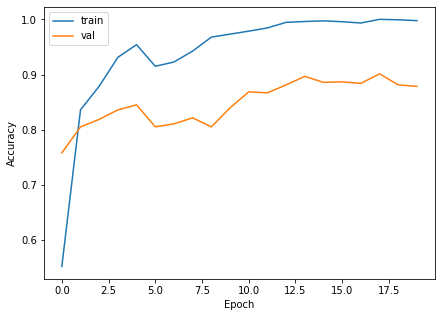

In [29]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plot All History Training

In [0]:
hist_train = []
hist_val = []

for h in history_all:
    hist_train.append(h.history['accuracy'][1:])
    hist_val.append(h.history['val_accuracy'][1:])

In [0]:
hist_train = np.array(hist_train).reshape(-1)
hist_val = np.array(hist_val).reshape(-1)

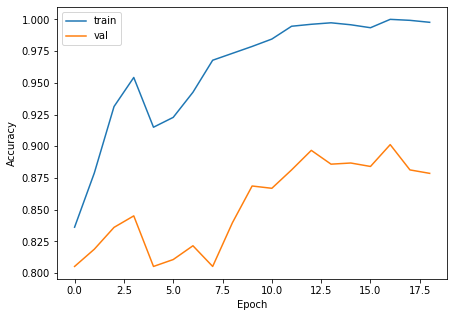

In [32]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(hist_train, label='train')
plt.plot(hist_val, label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate Model


In [0]:
scores = myModel.evaluate(X_test, y_test_hot, verbose=0)

In [34]:
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

Test loss    : 0.7095757567547881
Test accuracy: 84.08%


---
# Save Model

Save model into .h5 file


In [0]:
myModel.save("myModel.h5")


<font color = 'red' size = 5> 
* Download your model from the Files tab 
* Upload your model to a cloud storage

# Redownload The Model


In [0]:
!wget -O 'gdrive_downloader.py' 'https://github.com/CNN-ADF/Task2019/raw/master/resources/gdrive_downloader.py' -q

In [37]:
from gdrive_downloader import *

links = 'https://drive.google.com/open?id=1XR0UaWxf6-Ab7bqgkEYJD4IwNYzhNJQ_'

filename = 'myModel.h5'

model = model_downloader(links, filename)

model saved as myModel.h5


# Load The Model


In [0]:
# myModel = tf.keras.models.load_model('/content/myModel.h5')

# Re-Evaluate Model


In [0]:
train_scores = myModel.evaluate(X_train, y_train_hot, verbose=0)
test_scores  = myModel.evaluate(X_test, y_test_hot, verbose=0)
val_scores   = myModel.evaluate(X_val, y_val_hot, verbose=0)

In [40]:
print('Train Loss: %.5f with Accuracy: %.1f%%' % (train_scores[0], (train_scores[1]*100)))
print('Test  Loss: %.5f with Accuracy: %.1f%%' % (test_scores[0], (test_scores[1]*100)))
print('Val   Loss: %.5f with Accuracy: %.1f%%' % (val_scores[0], (val_scores[1]*100)))

Train Loss: 0.02525 with Accuracy: 99.1%
Test  Loss: 0.70958 with Accuracy: 84.1%
Val   Loss: 0.50708 with Accuracy: 87.9%


---
# Test the image from the internet


In [0]:
# chihuahua (10)
!wget -q -O 'data_test_0.jpg' 'https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/chihuahua-card-small.jpg?bust=1535568982'
# abyssinian (0)
!wget -q -O 'data_test_1.jpg' 'https://www.segalahobi.com/wp-content/uploads/2016/07/kucing-abyssinian.jpg'
# american bulldog (1)
!wget -q -O 'data_test_2.jpg' 'https://vetstreet.brightspotcdn.com/dims4/default/a473f63/2147483647/thumbnail/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2Fc5%2Fc9%2Fd3e1617243a0af32689019bba22c%2Famerican-bulldog-ap-04q7il-645-x-380.jpg'
# egyptian mau (11)
!wget -q -O 'data_test_3.jpg' 'https://1.bp.blogspot.com/-SL_H-_d4Ss0/V-dstvdGG3I/AAAAAAAADw0/mpkpgosgzHYKGGgSc8fWo78kqcg2mYGCQCLcB/s1600/SEJARAH%2BKUCING%2BEGYPTIAN%2BMAU.jpg'
# keeshond (24)
!wget -q -O 'data_test_4.jpg' 'https://anjingkita.com/nimages/305.jpg'

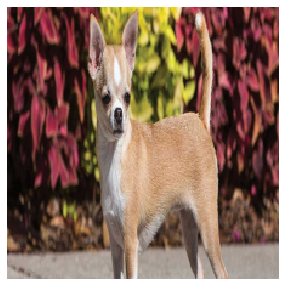

predicted id 10
class prediction 10
--------------------------------




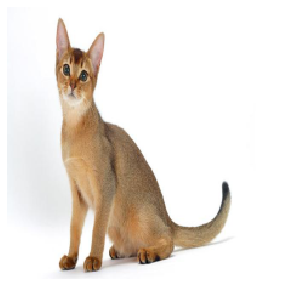

predicted id 0
class prediction 0
--------------------------------




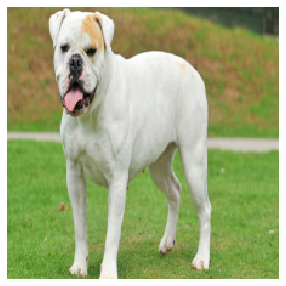

predicted id 1
class prediction 1
--------------------------------




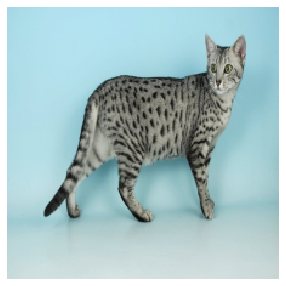

predicted id 11
class prediction 11
--------------------------------




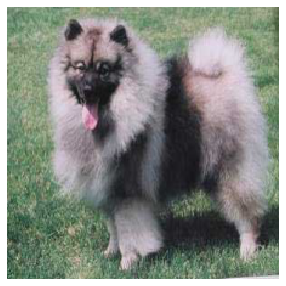

predicted id 24
class prediction 24
--------------------------------




In [52]:
for i in range(5):
  new_img = Image.open('data_test_'+str(i)+'.jpg')
  new_img = np.array(new_img)
  new_img2 = cv.resize(new_img, input_shape[:2], interpolation=cv.INTER_AREA)
  plt.imshow(new_img2)
  plt.axis('off')
  plt.show()

  new_img2 = np.expand_dims(new_img2,0).astype('float32')
  pred = myModel.predict(new_img2)
  class_id = np.argmax(pred)
  print('predicted id',class_id)
  print('class prediction', class_names[class_id])
  print('--------------------------------\n\n')


---

# Congratulation, You've Completed Final Task

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2019 - ADF</a> </p>

![footer](https://image.ibb.co/hAHDYK/footer2018.png)